In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

citydata= pd.read_csv(city_data_to_load)
ridedata= pd.read_csv(ride_data_to_load)

In [6]:
data = pd.merge(ridedata, citydata, on="city",how="left")
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
Urban_data=data[data["type"]=="Urban"]
Suburban_data=data[data["type"]=="Suburban"]
Rural_data=data[data["type"]=="Rural"]


In [8]:
rides_Urban=Urban_data.groupby("city").count()["ride_id"]
rides_Suburban=Suburban_data.groupby("city").count()["ride_id"]
rides_Rural=Rural_data.groupby("city").count()["ride_id"]

In [9]:
fare_Urban=Urban_data.groupby("city").mean()["fare"]
fare_Suburban=Suburban_data.groupby("city").mean()["fare"]
fare_Rural=Rural_data.groupby("city").mean()["fare"]

In [10]:
driver_Urban=Urban_data.groupby("city").mean()["driver_count"]
driver_Suburban=Suburban_data.groupby("city").mean()["driver_count"]
driver_Rural=Rural_data.groupby("city").mean()["driver_count"]

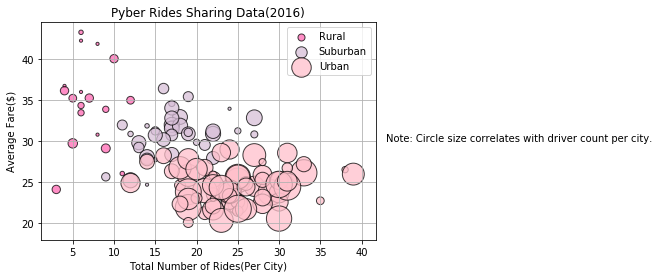

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(rides_Rural, fare_Rural, marker="o", facecolors="hotpink", edgecolors="black", s=driver_Rural*10, alpha=0.75,label="Rural")
plt.scatter(rides_Suburban, fare_Suburban, marker="o", facecolors="thistle", edgecolors="black", s=driver_Suburban*10, alpha=0.75,label="Suburban")
plt.scatter(rides_Urban, fare_Urban, marker="o", facecolors="pink", edgecolors="black", s=driver_Urban*10, alpha=0.75,label="Urban")


plt.title("Pyber Rides Sharing Data(2016)")

plt.legend(loc="upper right")
plt.grid()

plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.text(43,30,"Note: Circle size correlates with driver count per city.")


plt.savefig("scatterfig.png")
plt.show()
plt.tight_layout()

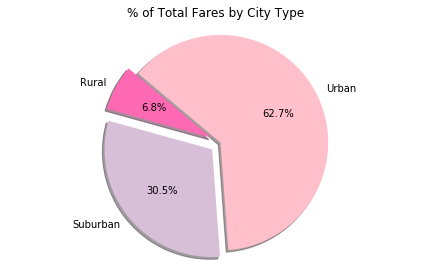

In [12]:
typegroup=data.groupby(["type"])
totalfare=typegroup.sum()["fare"]

labels = ["Rural", "Suburban", "Urban"]
colors = ["hotpink", "thistle", "pink"]
explode = (0.1, 0.1, 0)
plt.pie(totalfare, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.savefig("farefig.png")
plt.tight_layout()
plt.axis("equal")
plt.show()

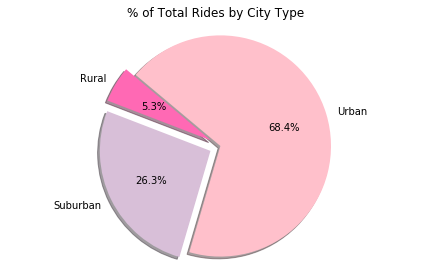

In [13]:
typegroup=data.groupby(["type"])
totalfare=typegroup.count()["ride_id"]

labels = ["Rural", "Suburban", "Urban"]
colors = ["hotpink", "thistle", "pink"]
explode = (0.1, 0.1, 0)
plt.pie(totalfare, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.savefig("ridesfig.png")
plt.tight_layout()
plt.axis("equal")
plt.show()


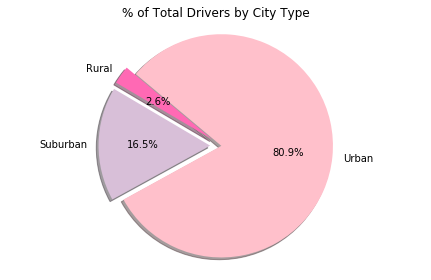

In [14]:
drivers_percent = citydata.groupby(["type"]).sum()["driver_count"]/citydata["driver_count"].sum()

labels = ["Rural", "Suburban", "Urban"]
colors = ["hotpink", "thistle", "pink"]
explode = (0.1, 0.1, 0)
plt.pie(drivers_percent, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)


plt.title("% of Total Drivers by City Type")
plt.savefig("driverfig.png")
plt.tight_layout()
plt.axis("equal")
plt.show()